In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('tabular_data/cleaned_all.csv')
df.head()

,unified_id,stellar_id,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude,mission
0,K00752.01,10797460,CONFIRMED,9.488036,2.95750,615.8,2.26,793.0,93.59,5455.0,0.927,4.467,15.347,KEPLER
1,K00752.02,10797460,CONFIRMED,54.418383,4.50700,874.8,2.83,443.0,9.11,5455.0,0.927,4.467,15.347,KEPLER
2,K00753.01,10811496,CANDIDATE,19.899140,1.78220,10829.0,14.60,638.0,39.30,5853.0,0.868,4.544,15.436,KEPLER
3,K00754.01,10848459,FALSE_POSITIVE,1.736952,2.40641,8079.2,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597,KEPLER
4,K00755.01,10854555,CONFIRMED,2.525592,1.65450,603.3,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509,KEPLER


In [4]:
df = df.drop(columns=['unified_id', 'stellar_id', 'mission'])
df.head()

,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude
0,CONFIRMED,9.488036,2.95750,615.8,2.26,793.0,93.59,5455.0,0.927,4.467,15.347
1,CONFIRMED,54.418383,4.50700,874.8,2.83,443.0,9.11,5455.0,0.927,4.467,15.347
2,CANDIDATE,19.899140,1.78220,10829.0,14.60,638.0,39.30,5853.0,0.868,4.544,15.436
3,FALSE_POSITIVE,1.736952,2.40641,8079.2,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597
4,CONFIRMED,2.525592,1.65450,603.3,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509


In [5]:
df = df[df['disposition'] != 'CANDIDATE']
df.head()

,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude
0,CONFIRMED,9.488036,2.95750,615.8,2.26,793.0,93.59,5455.0,0.927,4.467,15.347
1,CONFIRMED,54.418383,4.50700,874.8,2.83,443.0,9.11,5455.0,0.927,4.467,15.347
3,FALSE_POSITIVE,1.736952,2.40641,8079.2,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597
4,CONFIRMED,2.525592,1.65450,603.3,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509
5,CONFIRMED,11.094321,4.59450,1517.5,3.90,835.0,114.81,6046.0,0.972,4.486,15.714


In [6]:
df['disposition'] = df['disposition'].map({'FALSE_POSITIVE': 0, 'CONFIRMED': 1})
df.head()

,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude
0,1,9.488036,2.95750,615.8,2.26,793.0,93.59,5455.0,0.927,4.467,15.347
1,1,54.418383,4.50700,874.8,2.83,443.0,9.11,5455.0,0.927,4.467,15.347
3,0,1.736952,2.40641,8079.2,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597
4,1,2.525592,1.65450,603.3,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509
5,1,11.094321,4.59450,1517.5,3.90,835.0,114.81,6046.0,0.972,4.486,15.714


In [7]:
df.dtypes

disposition                int64
orbital_period_days      float64
transit_duration_hr      float64
transit_depth_ppm        float64
planet_radius_rearth     float64
equilibrium_temp_k       float64
insolation_flux_earth    float64
stellar_teff_k           float64
stellar_radius_rsun      float64
stellar_logg_cgs         float64
magnitude                float64
dtype: object

In [8]:
importances = df.drop(columns='disposition').corrwith(df['disposition']).abs().sort_values(ascending=False)
most_influential_col = importances.index[0]
print(f"The column that influences 'disposition' the most is: {most_influential_col}")
importances

The column that influences 'disposition' the most is: equilibrium_temp_k


equilibrium_temp_k       0.284579
stellar_teff_k           0.237828
stellar_logg_cgs         0.212189
transit_depth_ppm        0.208682
transit_duration_hr      0.154622
orbital_period_days      0.133483
stellar_radius_rsun      0.094352
magnitude                0.078021
insolation_flux_earth    0.041722
planet_radius_rearth     0.023072
dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Features and target
X = df.drop(columns='disposition')
y = df['disposition']

# Split into train (70%), validation (15%), test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train, y_train)

# Validation performance
y_val_pred_logreg = logreg.predict(X_val)
print("Logistic Regression Validation Classification Report:")
print(classification_report(y_val, y_val_pred_logreg))

Logistic Regression Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       957
           1       0.72      0.78      0.75       689

    accuracy                           0.78      1646
   macro avg       0.78      0.78      0.78      1646
weighted avg       0.79      0.78      0.78      1646



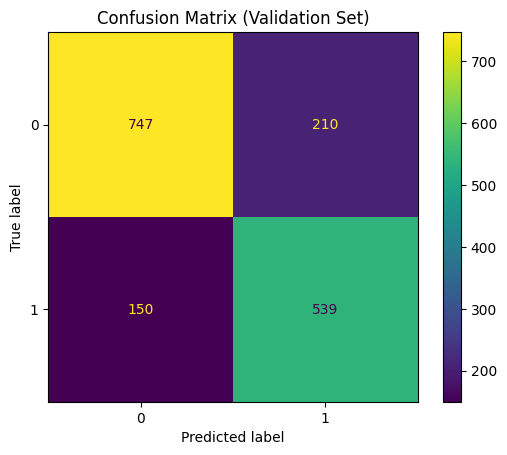

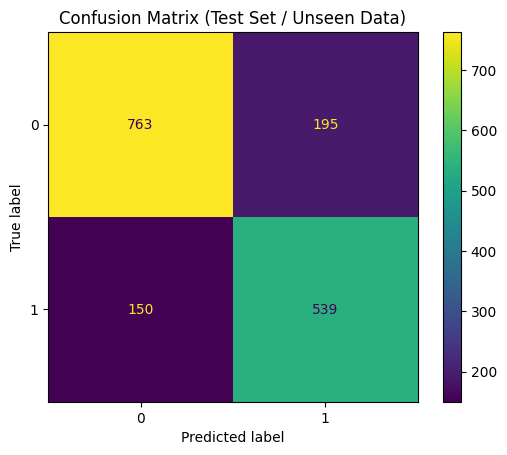

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_val, y_val)
plt.title("Confusion Matrix (Validation Set)")
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Confusion Matrix (Test Set / Unseen Data)")
plt.show()

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Validation performance
y_val_pred_rf = rf.predict(X_val)
print("Random Forest Validation Classification Report:")
print(classification_report(y_val, y_val_pred_rf))

Random Forest Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       957
           1       0.85      0.90      0.88       689

    accuracy                           0.89      1646
   macro avg       0.89      0.89      0.89      1646
weighted avg       0.89      0.89      0.89      1646



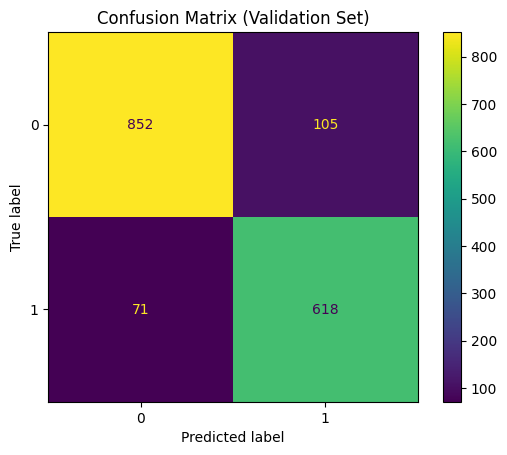

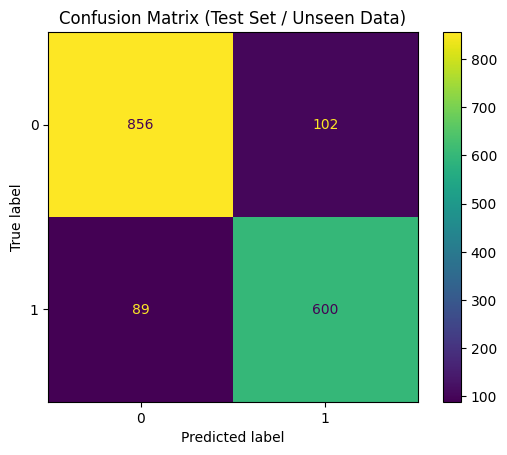

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf, X_val, y_val)
plt.title("Confusion Matrix (Validation Set)")
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Confusion Matrix (Test Set / Unseen Data)")
plt.show()

## XGBoost

In [12]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

# Validation performance
y_val_pred = xgb.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

[0]	validation_0-logloss:0.55667
[1]	validation_0-logloss:0.48524
[2]	validation_0-logloss:0.43665
[3]	validation_0-logloss:0.40146
[4]	validation_0-logloss:0.37821
[5]	validation_0-logloss:0.35764
[6]	validation_0-logloss:0.34313
[7]	validation_0-logloss:0.33418
[8]	validation_0-logloss:0.32599
[9]	validation_0-logloss:0.31946
[10]	validation_0-logloss:0.31411
[11]	validation_0-logloss:0.30764
[12]	validation_0-logloss:0.30498
[13]	validation_0-logloss:0.29708
[14]	validation_0-logloss:0.29433
[15]	validation_0-logloss:0.29041
[16]	validation_0-logloss:0.28725
[17]	validation_0-logloss:0.28321
[18]	validation_0-logloss:0.28182
[19]	validation_0-logloss:0.28088
[20]	validation_0-logloss:0.27910
[21]	validation_0-logloss:0.27710
[22]	validation_0-logloss:0.27508
[23]	validation_0-logloss:0.27290
[24]	validation_0-logloss:0.27285
[25]	validation_0-logloss:0.27041
[26]	validation_0-logloss:0.26912
[27]	validation_0-logloss:0.26762
[28]	validation_0-logloss:0.26453
[29]	validation_0-loglos

/home/syntropy/NASA/globalnom1/exoplantropy/nasa-venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:12:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[61]	validation_0-logloss:0.25313
[62]	validation_0-logloss:0.25288
[63]	validation_0-logloss:0.25224
[64]	validation_0-logloss:0.25251
[65]	validation_0-logloss:0.25234
[66]	validation_0-logloss:0.25190
[67]	validation_0-logloss:0.25218
[68]	validation_0-logloss:0.25168
[69]	validation_0-logloss:0.25178
[70]	validation_0-logloss:0.25240
[71]	validation_0-logloss:0.25262
[72]	validation_0-logloss:0.25319
[73]	validation_0-logloss:0.25351
[74]	validation_0-logloss:0.25318
[75]	validation_0-logloss:0.25348
[76]	validation_0-logloss:0.25427
[77]	validation_0-logloss:0.25431
[78]	validation_0-logloss:0.25411
[79]	validation_0-logloss:0.25127
[80]	validation_0-logloss:0.25171
[81]	validation_0-logloss:0.25212
[82]	validation_0-logloss:0.25157
[83]	validation_0-logloss:0.25158
[84]	validation_0-logloss:0.25151
[85]	validation_0-logloss:0.25240
[86]	validation_0-logloss:0.25191
[87]	validation_0-logloss:0.25215
[88]	validation_0-logloss:0.25169
[89]	validation_0-logloss:0.25204
[90]	validatio

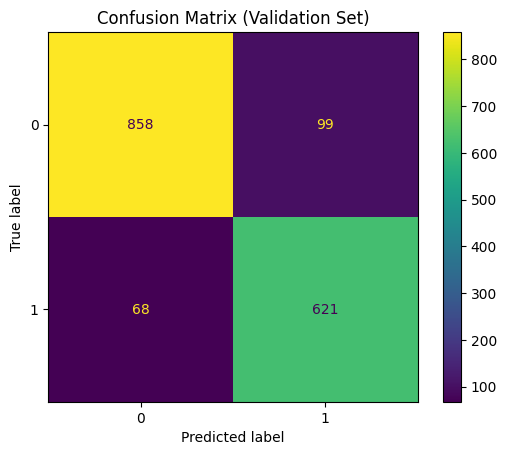

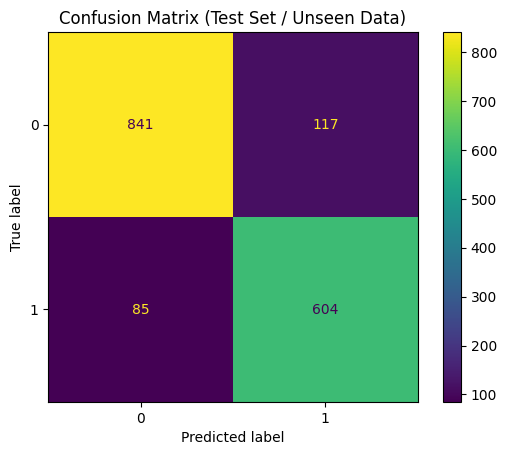

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb, X_val, y_val)
plt.title("Confusion Matrix (Validation Set)")
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.title("Confusion Matrix (Test Set / Unseen Data)")
plt.show()

# LightGBM

In [14]:
from lightgbm import LGBMClassifier

# Train LightGBM model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)])

# Validation performance
y_val_pred_lgbm = lgbm.predict(X_val)
print("LightGBM Validation Classification Report:")
print(classification_report(y_val, y_val_pred_lgbm))

[LightGBM] [Info] Number of positive: 3214, number of negative: 4469
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 7683, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.418326 -> initscore=-0.329648
[LightGBM] [Info] Start training from score -0.329648
LightGBM Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       957
           1       0.86      0.90      0.88       689

    accuracy                           0.90      1646
   macro avg       0.89      0.90      0.89      1646
weighted avg       0.90      0.90      0.90      1646



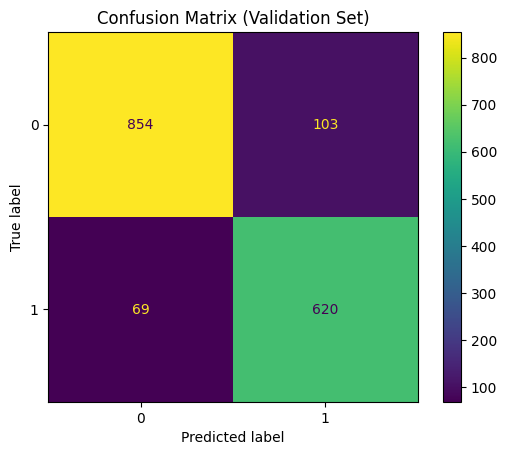

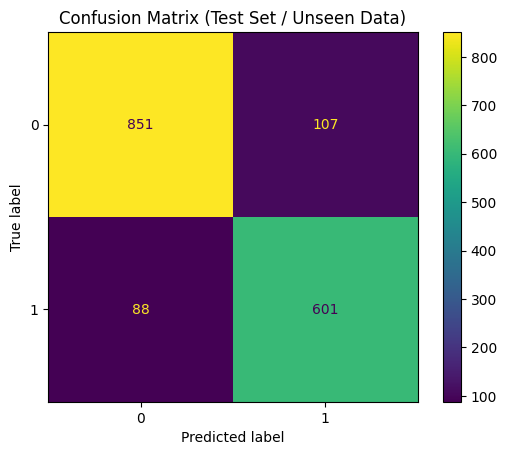

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lgbm, X_val, y_val)
plt.title("Confusion Matrix (Validation Set)")
ConfusionMatrixDisplay.from_estimator(lgbm, X_test, y_test)
plt.title("Confusion Matrix (Test Set / Unseen Data)")
plt.show()

In [16]:
from catboost import CatBoostClassifier
import catboost

# Train CatBoost model
cat = CatBoostClassifier(verbose=100, random_state=42)
cat.fit(X_train, y_train, eval_set=(X_val, y_val))

# Validation performance
y_val_pred_catboost = cat.predict(X_val)
print("CatBoost Validation Classification Report:")
print(classification_report(y_val, y_val_pred_catboost))

Learning rate set to 0.052437
0:	learn: 0.6575759	test: 0.6584302	best: 0.6584302 (0)	total: 56.3ms	remaining: 56.2s
100:	learn: 0.2828031	test: 0.2965316	best: 0.2965316 (100)	total: 243ms	remaining: 2.16s
200:	learn: 0.2315096	test: 0.2620040	best: 0.2620040 (200)	total: 423ms	remaining: 1.68s
300:	learn: 0.1969455	test: 0.2504167	best: 0.2504167 (300)	total: 606ms	remaining: 1.41s
400:	learn: 0.1721597	test: 0.2448758	best: 0.2448010 (398)	total: 788ms	remaining: 1.18s
500:	learn: 0.1521956	test: 0.2415750	best: 0.2414922 (493)	total: 969ms	remaining: 965ms
600:	learn: 0.1356560	test: 0.2388459	best: 0.2387030 (597)	total: 1.15s	remaining: 763ms
700:	learn: 0.1221926	test: 0.2390289	best: 0.2387030 (597)	total: 1.34s	remaining: 570ms
800:	learn: 0.1104896	test: 0.2392889	best: 0.2387030 (597)	total: 1.53s	remaining: 380ms
900:	learn: 0.1002227	test: 0.2394142	best: 0.2387030 (597)	total: 1.74s	remaining: 191ms
999:	learn: 0.0911089	test: 0.2387807	best: 0.2383843 (980)	total: 1.94s	

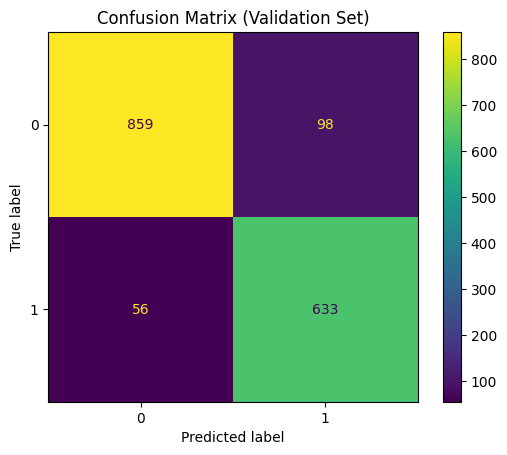

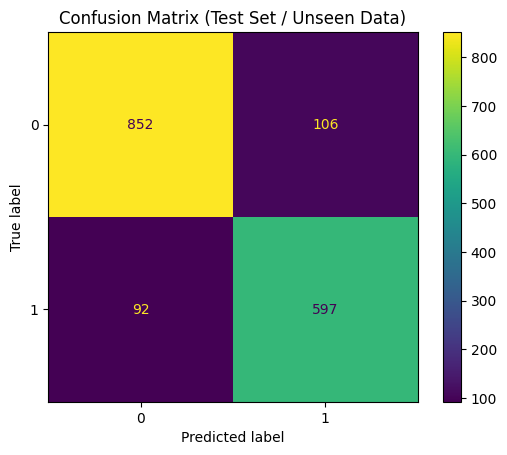

In [17]:
ConfusionMatrixDisplay.from_estimator(cat, X_val, y_val)
plt.title("Confusion Matrix (Validation Set)")
ConfusionMatrixDisplay.from_estimator(cat, X_test, y_test)
plt.title("Confusion Matrix (Test Set / Unseen Data)")
plt.show()

# Gradient Boosting Classifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Validation performance
y_val_pred_gbc = gbc.predict(X_val)
print("Gradient Boosting Validation Classification Report:")
print(classification_report(y_val, y_val_pred_gbc))

Gradient Boosting Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       957
           1       0.82      0.89      0.85       689

    accuracy                           0.87      1646
   macro avg       0.87      0.87      0.87      1646
weighted avg       0.87      0.87      0.87      1646



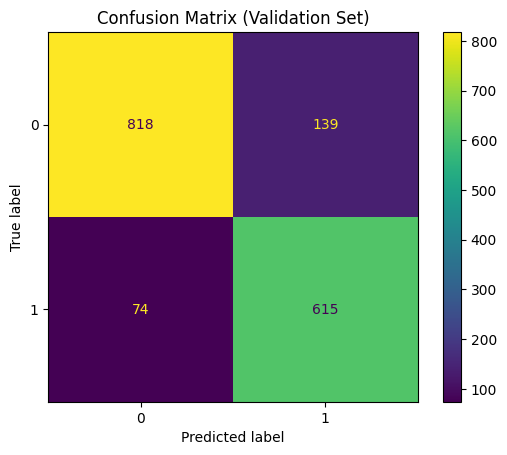

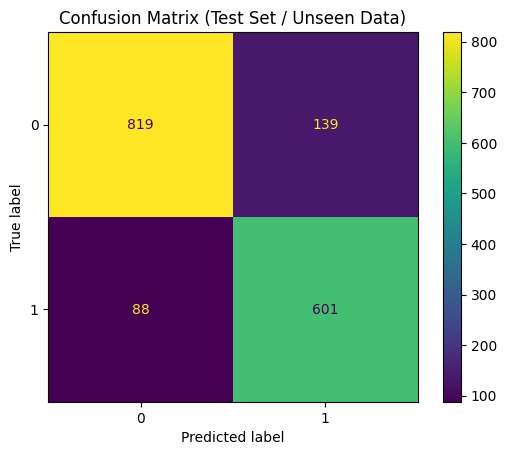

In [19]:
ConfusionMatrixDisplay.from_estimator(gbc, X_val, y_val)
plt.title("Confusion Matrix (Validation Set)")
ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test)
plt.title("Confusion Matrix (Test Set / Unseen Data)")
plt.show()

# MLP

In [ ]:

# One-hot encode 'disposition'
y_train_oh = pd.get_dummies(y_train)
y_val_oh = pd.get_dummies(y_val)
y_test_oh = pd.get_dummies(y_test)

print(y_train_oh.head())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import pandas as pd

# --- Step 1: Split features and target ---
X = df.drop(columns='disposition')
y = df['disposition']

# --- Step 2: Identify categorical and numeric columns ---
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# --- Step 3: Split into train / validation / test ---
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# --- Step 4: Preprocessing ---
# Scale numeric features, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# --- Step 5: Define the MLP model ---
mlp = MLPClassifier(
    hidden_layer_sizes=(50000,),   # 5000 is too large; start smaller
    activation='relu',
    solver='adam',
    max_iter=10000,
    random_state=42,
    verbose=True
)

# --- Step 6: Combine preprocessing + model ---
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', mlp)
])

# --- Step 7: Train ---
model.fit(X_train, y_train)

# --- Step 8: Evaluate on validation set ---
y_val_pred = model.predict(X_val)
print("MLP Validation Classification Report:")
print(classification_report(y_val, y_val_pred))


Iteration 1, loss = 0.50969749
Iteration 2, loss = 0.44357122
Iteration 3, loss = 0.41632028
Iteration 4, loss = 0.40368223
Iteration 5, loss = 0.39164883
Iteration 6, loss = 0.38236922
Iteration 7, loss = 0.37655430
Iteration 8, loss = 0.37245539
Iteration 9, loss = 0.36663619
Iteration 10, loss = 0.36279259
Iteration 11, loss = 0.36052800
Iteration 12, loss = 0.35699218
Iteration 13, loss = 0.35717332
Iteration 14, loss = 0.35529291
Iteration 15, loss = 0.34818885
Iteration 16, loss = 0.34640886
Iteration 17, loss = 0.34610835
Iteration 18, loss = 0.34465345
Iteration 19, loss = 0.34419425
Iteration 20, loss = 0.33979019
Iteration 21, loss = 0.34152176
Iteration 22, loss = 0.33584830
Iteration 23, loss = 0.33632382
Iteration 24, loss = 0.33366815
Iteration 25, loss = 0.33649746
Iteration 26, loss = 0.33172410
Iteration 27, loss = 0.33421507
Iteration 28, loss = 0.33440586
Iteration 29, loss = 0.32742617
Iteration 30, loss = 0.32577727
Iteration 31, loss = 0.32552299
Iteration 32, los

/home/syntropy/NASA/globalnom1/exoplantropy/nasa-venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/syntropy/NASA/globalnom1/exoplantropy/nasa-venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


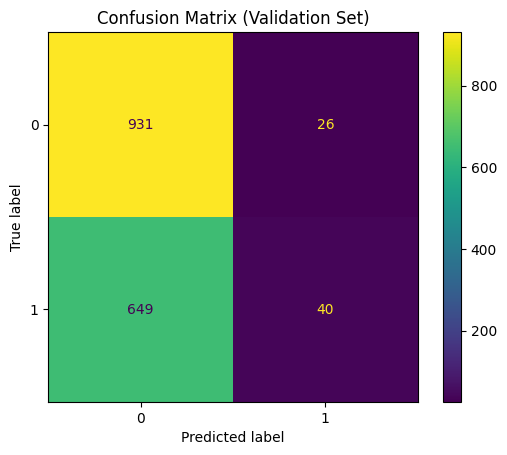

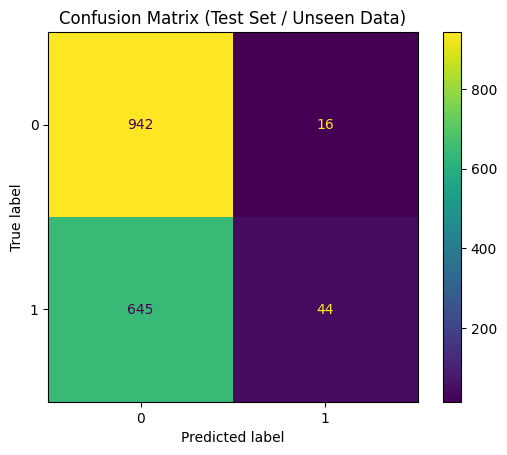

In [20]:
ConfusionMatrixDisplay.from_estimator(mlp, X_val, y_val)
plt.title("Confusion Matrix (Validation Set)")
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
plt.title("Confusion Matrix (Test Set / Unseen Data)")
plt.show()